In [3]:
import numpy as np
import pandas as pd


In [4]:
def create_vocabulary(documents):
    vocabulary = set()
    for document in documents:
        vocabulary.update(document.split())
    return sorted(list(vocabulary))

def vectorize_document(document, vocabulary):
    vector = np.zeros(len(vocabulary))
    for i, term in enumerate(vocabulary):
        vector[i] = document.split().count(term)
    return vector

def cosine_similarity(vector1, vector2):
    # Compute cosine similarity between two vectors
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm1 * norm2)
    return similarity

def calculate_similarity_matrix(documents, vocabulary):
    num_documents = len(documents)
    similarity_matrix = np.zeros((num_documents, num_documents))

    # Calculate cosine similarity for each pair
    for i in range(num_documents):
        for j in range(num_documents):
            similarity_matrix[i][j] = cosine_similarity(documents[i], documents[j])
    return similarity_matrix

In [5]:
# Step 1: Define the list of documents
documents = [
    "she wore a dress and red earrings",
    "the dress has a red wine stain",
    "tomorrow I will wear my new red dress",
    "the red dress in the photo resembles the red dress she is wearing",
    "short dress",
    "red lipstick"
]

# Step 2: Create vocabulary
vocabulary = ['a', 'and', 'dress', 'earrings', 'has', 'i', 'in', 'is', 'lipstick', 'my', 'new', 'photo', 'red', 'resembles', 'she', 'short', 'stain', 'the', 'tomorrow', 'wear', 'wearing', 'will', 'wine', 'wore']

# Step 3: Vectorize documents
document_vectors = [vectorize_document(doc, vocabulary) for doc in documents]

# Step 4: Calculate similarity matrix
similarity_matrix = calculate_similarity_matrix(document_vectors, vocabulary)

# Create DataFrame for heatmap
df_similarity_matrix = pd.DataFrame(similarity_matrix, columns=range(1, len(documents) + 1), index=range(1, len(documents) + 1))

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

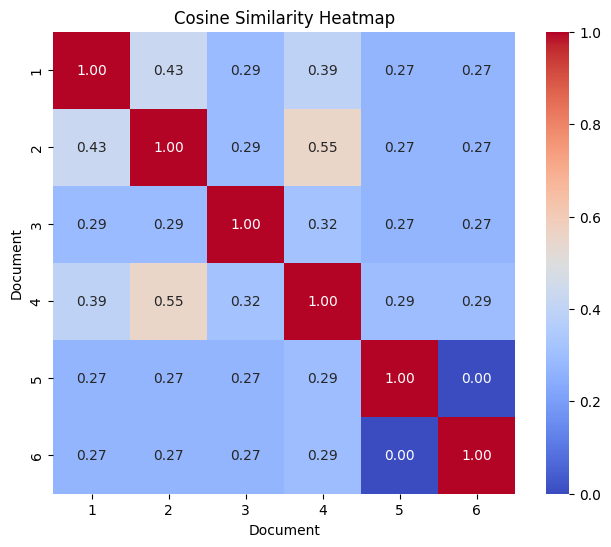

In [7]:
#heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_similarity_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Document')
plt.ylabel('Document')
plt.show()